## Анализ

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("pastel")

#### Датасет по недвижимости в Париже

#### Столбцы:

* **squareMeters** - площадь (кв. м)
* **numberOfRooms** - количество комнат
* **hasYard** - наличие двора
* **hasPool** - наличие бассейна
* **floors** - количество этажей
* **cityCode** - код города (почтовый индекс)
* **cityPartRange** - район города
* **numPrevOwners** - количество предыдущих владельцев
* **made** - год постройки
* **isNewBuilt** - новостройка или нет
* **hasStormProtector** - наличие защита от шторма
* **basement** - подвал
* **attic** - чердак
* **garage** - гараж
* **hasStorageRoom** - наличие кладовой
* **hasGuestRoom** - наличие гостевой комнаты
* **price** - цена (целевая переменная)

In [59]:
df = pd.read_csv("ParisHousing.csv")
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [60]:
df.shape

(10000, 17)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


#### Целевая переменная - Price.

In [63]:
df[df["numberOfRooms"] == 100]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
87,12757,100,1,0,7,19550,7,8,2020,1,1,6795,9983,738,0,5,1277834.0
179,96091,100,0,1,24,99874,10,3,1999,0,0,6546,4094,373,0,6,9615021.9
182,20468,100,1,0,34,63924,6,4,2003,0,1,9659,6233,802,0,0,2049846.3
309,4885,100,0,0,54,79559,7,8,1993,0,0,9519,8043,718,0,6,493693.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585,6639,100,1,1,29,97972,7,2,2004,0,0,2538,5362,252,0,5,670298.4
9635,71195,100,1,0,45,56017,6,6,2017,0,1,4221,8445,962,1,5,7126909.7
9839,38470,100,1,1,42,83391,8,8,2018,0,1,3625,8121,995,0,6,3857901.8
9876,1565,100,0,1,1,76383,6,4,2005,1,0,2062,8379,946,1,0,160603.5


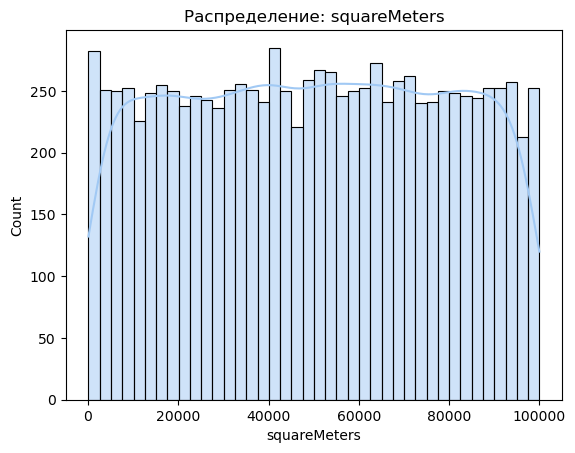

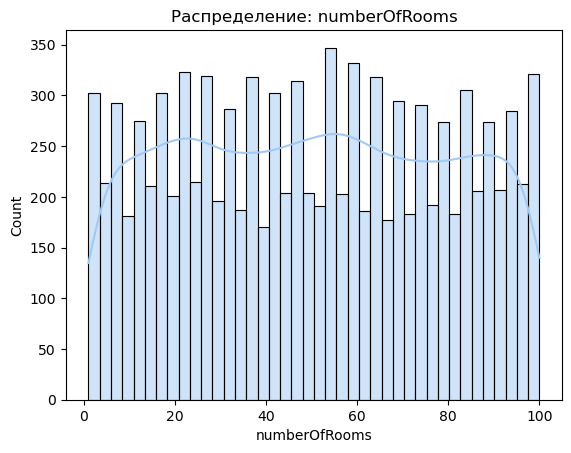

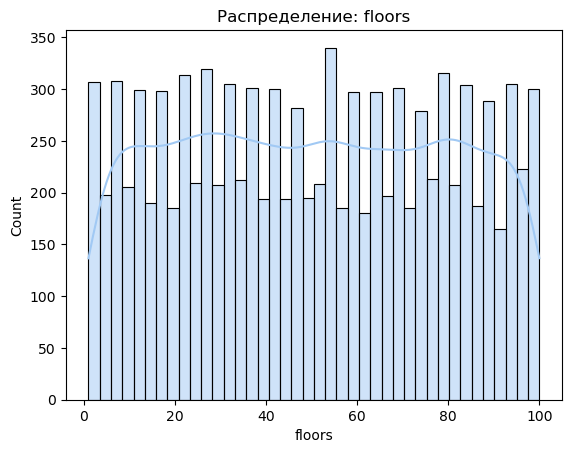

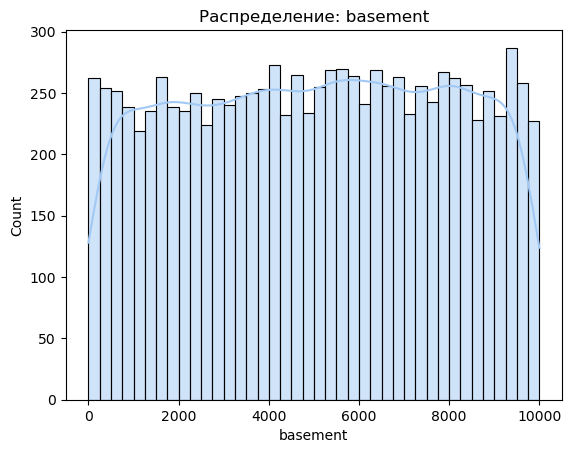

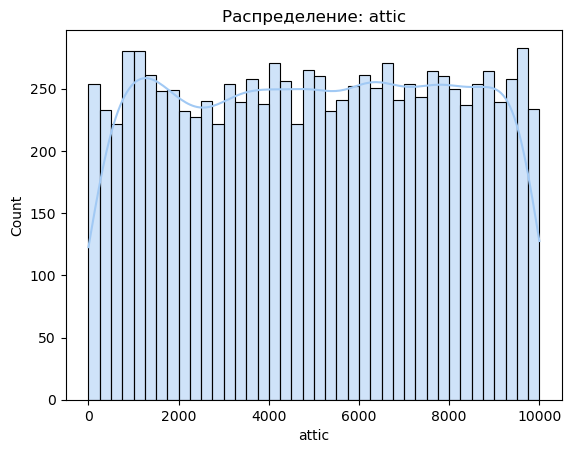

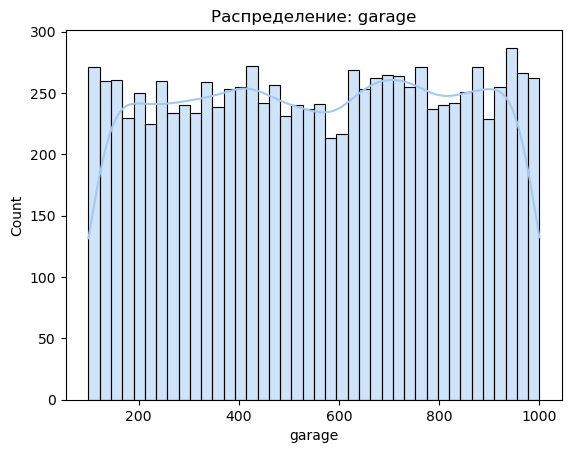

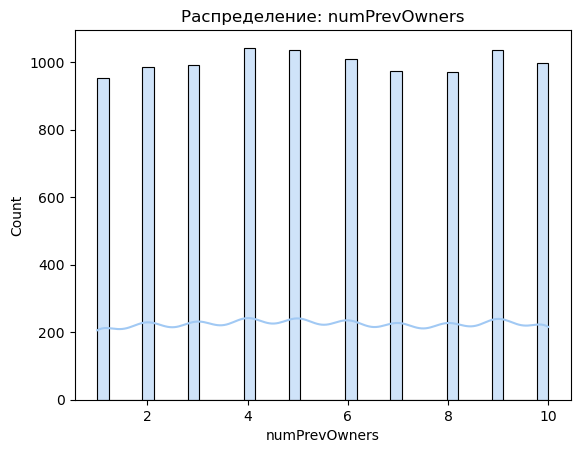

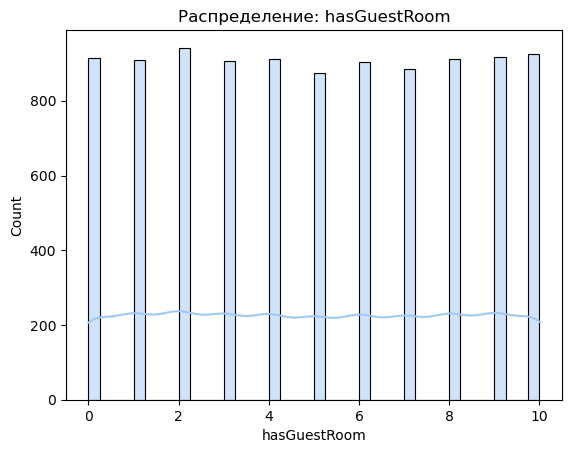

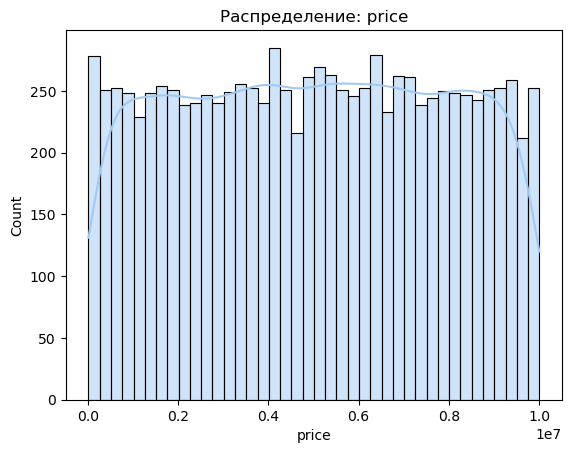

In [64]:
numeric_cols = [
    "squareMeters", "numberOfRooms", "floors",
    "basement", "attic", "garage", "numPrevOwners",
    "hasGuestRoom", "price"
]

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(f"Распределение: {col}")
    plt.show()

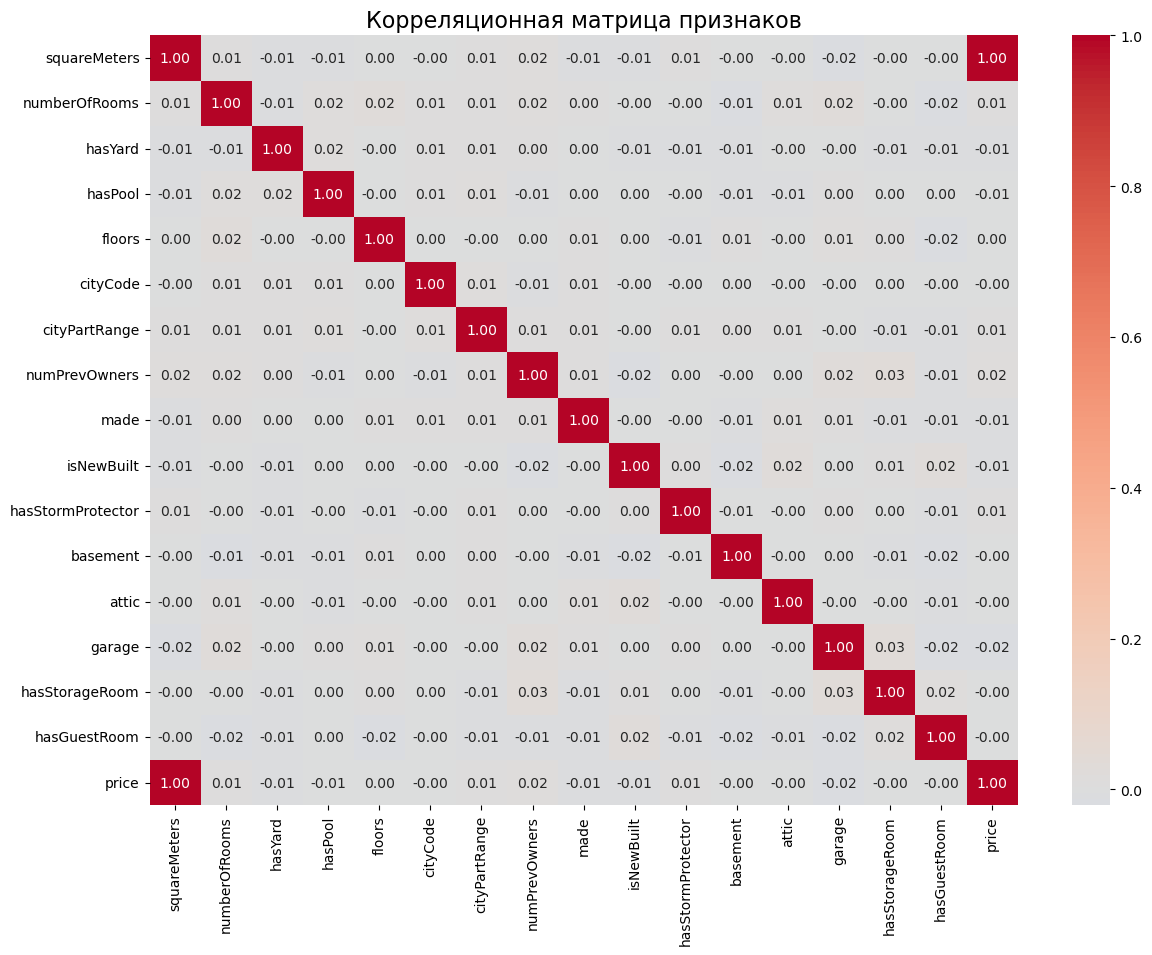

In [65]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f"
)

plt.title("Корреляционная матрица признаков", fontsize=16)
plt.show()

Сильная корреляция: squareMeters и price.

In [66]:
df["cityCode"].value_counts()

cityCode
97260    3
96283    3
56356    3
95054    3
83194    3
        ..
46975    1
41731    1
49663    1
23385    1
97667    1
Name: count, Length: 9509, dtype: int64

In [67]:
df["cityPartRange"].value_counts()

cityPartRange
8     1035
5     1031
10    1004
4     1001
3      999
9      997
1      994
2      990
7      984
6      965
Name: count, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X = df.drop(columns=["price"]).values
y = np.log1p(df["price"].values)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test   = scaler.transform(X_test)

In [69]:
model = keras.Sequential([
    layers.Dense(128, input_shape=(X_train.shape[1],), activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="relu")
])

model.compile(optimizer="adam", loss="mae", metrics=["mae"])

D:\Python\Anaconda\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=256,
    verbose=1
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12.2107 - mae: 12.2107 - val_loss: 8.2433 - val_mae: 8.2433
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8387 - mae: 3.8387 - val_loss: 1.7011 - val_mae: 1.7011
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3581 - mae: 1.3581 - val_loss: 1.2406 - val_mae: 1.2406
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1724 - mae: 1.1724 - val_loss: 1.1130 - val_mae: 1.1130
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0638 - mae: 1.0638 - val_loss: 1.0241 - val_mae: 1.0241
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9758 - mae: 0.9758 - val_loss: 0.9485 - val_mae: 0.9485
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9017 - mae: 0.9017 - val_loss: 0.8886 - val_mae: 0.8886
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8375 - mae: 0.8375 - val_loss: 0.8256 - val_mae: 0.8256
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7861 - mae

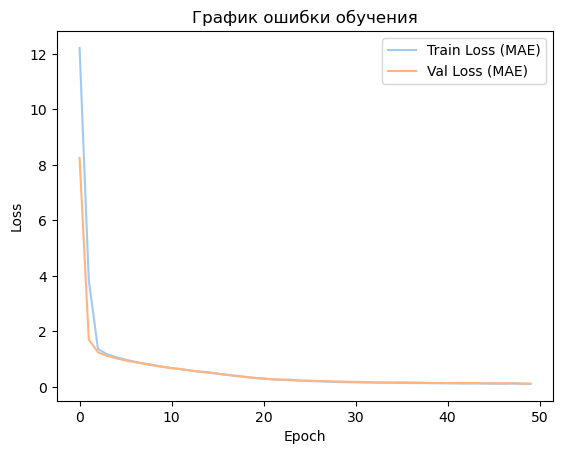

In [71]:
plt.plot(history.history["loss"], label="Train Loss (MAE)")
plt.plot(history.history["val_loss"], label="Val Loss (MAE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("График ошибки обучения")
plt.legend()
plt.show()

In [105]:
y_test_pred = model.predict(X_test).ravel()
y_test_pred_price = np.expm1(y_test_pred)
y_test_pred_price

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step


array([8623422. , 4004095. , 8745665. , ..., 1678137.5, 3402219.8,
       7138548.5], dtype=float32)

## Собственная реализация

In [74]:
IS_LOG_TARGET = True
hidden_sizes = [64, 32]
epochs = 100
learning_rate = 0.001
rng = np.random.default_rng(0)

In [75]:
def relu(x: np.ndarray) -> np.ndarray:
    """
    Применяет функцию активации ReLU.

    Args:
        x (np.ndarray): Входная матрица/вектор.

    Returns:
        np.ndarray: Та же форма, элементы < 0 заменены на 0.
    """
    return np.maximum(0.0, x)


def relu_grad(x: np.ndarray) -> np.ndarray:
    """
    Вычисляет производную ReLU по входу.

    Args:
        x (np.ndarray): Входная матрица/вектор.

    Returns:
        np.ndarray: Матрица из 0 и 1, где 1 если элемент > 0.
    """
    return (x > 0).astype(x.dtype)


def mae(y_pred: np.ndarray, y_true: np.ndarray) -> float:
    """
    Средняя абсолютная ошибка (MAE).

    Args:
        y_pred (np.ndarray): Предсказанные значения.
        y_true (np.ndarray): Истинные значения).

    Returns:
        float: Средняя абсолютная ошибка.
    """
    return np.mean(np.abs(y_pred - y_true))

In [76]:
def init_mlp(layer_sizes: list[int], rng: np.random.Generator):
    """
    Инициализирует веса и смещения многослойного перцептрона.

    Args:
        layer_sizes (list[int]): Список размеров слоёв, например [D, 64, 32, 1].
        rng (np.random.Generator): Генератор случайных чисел.

    Returns:
        tuple[list[np.ndarray], list[np.ndarray]]:
            - Список весов W[i].
            - Список смещений b[i].
    """
    weights, biases = [], []
    for i in range(len(layer_sizes) - 1):
        input_dimension, output_dimension = layer_sizes[i], layer_sizes[i+1]
        w = rng.standard_normal((input_dimension, output_dimension)) * np.sqrt(2.0 / input_dimension)
        weights.append(w)
        biases.append(np.zeros(output_dimension))
    return weights, biases

In [112]:
# def forward(X: np.ndarray, weights: list[np.ndarray], biases: list[np.ndarray]):
#     """
#     Прямое распространение по сети.

#     Args:
#         X (np.ndarray): Матрица входов, форма (N, D).
#         weights (list[np.ndarray]): Список матриц весов.
#         biases (list[np.ndarray]): Список векторов смещений.

#     Returns:
#         tuple[np.ndarray, list[tuple[np.ndarray, np.ndarray]]]:
#             - y_pred (np.ndarray): Предсказания.
#             - caches (list): список (Z, A) для каждого скрытого слоя,
#               где Z — линейная комбинация, A — выход после ReLU.
#     """
#     A = X
#     caches = []
#     for i in range(len(weights)):
#         Z = A @ weights[i] + biases[i]
#         A = relu(Z)
#         caches.append((Z, A))
#     y_pred = A.squeeze(axis=1)
#     return y_pred, caches


# def backward(X: np.ndarray, y_true: np.ndarray, y_pred: np.ndarray,
#              weights: list[np.ndarray], biases: list[np.ndarray],
#              caches: list[tuple[np.ndarray, np.ndarray]]):
#     """
#     Обратное распространение ошибки для MAE.

#     Args:
#         X (np.ndarray): Матрица входов.
#         y_true (np.ndarray): Истинные значения.
#         y_pred (np.ndarray): Предсказания.
#         weights (list[np.ndarray]): Текущие веса сети.
#         biases (list[np.ndarray]): Текущие смещения сети.
#         caches (list[tuple[np.ndarray, np.ndarray]]): Промежуточные значения (Z, A).

#     Returns:
#         tuple[list[np.ndarray], list[np.ndarray]]:
#             - dW: список градиентов по весам.
#             - dB: список градиентов по смещениям.
#     """
#     N = X.shape[0]
#     L = len(weights)

#     dL_dy = np.sign(y_pred - y_true) / N
#     dL_dZ = dL_dy.reshape(-1, 1)

#     dW = [None] * L
#     dB = [None] * L

#     # выходной слой
#     if L == 1:
#         A_prev = X
#     else:
#         A_prev = caches[-1][1]
#     dW[L-1] = A_prev.T @ dL_dZ
#     dB[L-1] = dL_dZ.sum(axis=0)

#     dA_prev = dL_dZ @ weights[-1].T

#     # скрытые слои
#     for layer in range(L-2, -1, -1):
#         if layer == 0:
#             A_prev = X
#         else:
#             A_prev = caches[layer-1][1]
#         Z_curr = caches[layer][0]
#         dZ = dA_prev * relu_grad(Z_curr)

#         dW[layer] = A_prev.T @ dZ
#         dB[layer] = dZ.sum(axis=0)

#         dA_prev = dZ @ weights[layer].T

#     return dW, dB

In [113]:
def forward(X: np.ndarray, weights: list[np.ndarray], biases: list[np.ndarray]):
    """
    Прямое распространение по сети с ReLU на всех слоях, включая выход.
    Возвращает y_pred и кэши (Z, A) для КАЖДОГО слоя (в т.ч. выходного).
    """
    A = X
    caches = []
    for i in range(len(weights)):
        Z = A @ weights[i] + biases[i]
        A = relu(Z)        # ReLU и на выходе по твоему требованию
        caches.append((Z, A))
    y_pred = A.squeeze(axis=1)
    return y_pred, caches


def backward(X: np.ndarray, y_true: np.ndarray, y_pred: np.ndarray,
             weights: list[np.ndarray], biases: list[np.ndarray],
             caches: list[tuple[np.ndarray, np.ndarray]]):
    """
    Обратное распространение для MAE при ReLU на каждом слое (и на выходном тоже).
    """
    N = X.shape[0]
    L = len(weights)

    # dL/dy для MAE
    dL_dy = np.sign(y_pred - y_true).astype(np.float32) / N   # (N,)

    dW = [None] * L
    dB = [None] * L

    # ----- Выходной слой -----
    Z_last, A_last = caches[-1]           # формы (N,1) и (N,1)
    dA_last = dL_dy.reshape(-1, 1)        # (N,1)
    dZ_last = dA_last * relu_grad(Z_last) # (N,1)

    A_prev = X if L == 1 else caches[-2][1]     # (N, H_{L-1}) или (N, D)
    dW[L-1] = A_prev.T @ dZ_last                # (H_{L-1}, 1)
    dB[L-1] = dZ_last.sum(axis=0)               # (1,)

    dA_prev = dZ_last @ weights[-1].T           # (N, H_{L-1}) или (N, D)

    # ----- Скрытые слои (обратно) -----
    for layer in range(L-2, -1, -1):
        Z_curr, A_curr = caches[layer]
        A_prev = X if layer == 0 else caches[layer-1][1]

        dZ = dA_prev * relu_grad(Z_curr)        # (N, H_layer)
        dW[layer] = A_prev.T @ dZ               # (H_{layer-1}, H_layer) или (D, H1)
        dB[layer] = dZ.sum(axis=0)              # (H_layer,)

        dA_prev = dZ @ weights[layer].T

    return dW, dB


In [107]:
def sgd_step(weights: list[np.ndarray], biases: list[np.ndarray],
             dW: list[np.ndarray], dB: list[np.ndarray], learning_rate: float):
    """
    Обновляет веса и смещения методом SGD.

    Args:
        weights (list[np.ndarray]): Список матриц весов.
        biases (list[np.ndarray]): Список смещений.
        dW (list[np.ndarray]): Градиенты по весам.
        dB (list[np.ndarray]): Градиенты по смещениям.
        learning_rate (float): Скорость обучения.
    """
    for i in range(len(weights)):
        weights[i] -= learning_rate * dW[i]
        biases[i] -= learning_rate * dB[i]

In [108]:
input_dimension = X_train.shape[1]
layer_sizes = [input_dimension] + hidden_sizes + [1]
weights, biases = init_mlp(layer_sizes, rng)

In [114]:
train_mae_hist, val_mae_hist = [], []

for epoch in range(epochs):
    y_pred_train, caches = forward(X_train, weights, biases)
    loss_train = mae(y_pred_train, y_train)

    dW, dB = backward(X_train, y_train, y_pred_train, weights, biases, caches)
    sgd_step(weights, biases, dW, dB, learning_rate)

    y_pred_test, _ = forward(X_test, weights, biases)
    loss_val = mae(y_pred_test, y_test)

    train_mae_hist.append(loss_train)
    val_mae_hist.append(loss_val)

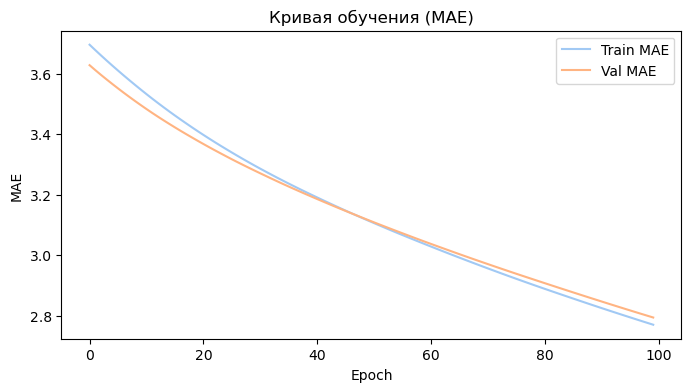

In [115]:
plt.figure(figsize=(8,4))
plt.plot(train_mae_hist, label="Train MAE")
plt.plot(val_mae_hist, label="Val MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Кривая обучения (MAE)")
plt.legend()
plt.show()

In [117]:
y_val_pred_price = np.expm1(y_pred_test)
y_val_pred_price

array([1.54932108e+09, 1.63916471e+07, 1.57983575e+09, ...,
       8.98566058e+03, 2.88224046e+04, 2.79109792e+06])